Alfredo Winston - 2702297776

Class : LC09 - Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove Warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('3B.tsv', sep = '\t')

df

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,Yes,No,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",500,Delivery,no,no,no,yes,no,yes,no
1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,No,No,NaN,0,JP Nagar,Quick Bites,"North Indian, Rajasthani",500,Delivery,no,no,no,yes,no,no,no
2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,No,No,4.2,1279,Church Street,Pub,"Continental, Italian, Burger","1,100",Drinks & nightlife,no,no,no,no,no,yes,no
3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,No,No,2.9,58,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",250,Dine-out,no,yes,no,yes,no,no,no
4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,Yes,No,3.5,8,BTM,Dessert Parlor,Ice Cream,130,Delivery,no,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,https://www.zomato.com/bangalore/sri-vasavi-re...,Sri Vasavi Restaurant,No,No,3.6,30,Bellandur,Quick Bites,"Chinese, Biryani",250,Delivery,no,yes,no,yes,no,no,no
14996,https://www.zomato.com/bangalore/hoppipola-chu...,Hoppipola,Yes,No,4.3,1708,Church Street,Lounge,"Continental, Mediterranean, European","1,300",Delivery,no,no,no,no,yes,no,no
14997,https://www.zomato.com/bangalore/ghar-ki-rasoi...,Ghar Ki Rasoi,Yes,No,3.7,50,Bellandur,Casual Dining,North Indian,500,Delivery,no,no,no,yes,no,no,no
14998,https://www.zomato.com/bangalore/ice-cubes-ind...,Ice Cubes,No,No,3.0,16,Indiranagar,Quick Bites,"Fast Food, Desserts, Beverages",300,Dine-out,yes,no,no,no,no,yes,yes


In [4]:
print(f"Number of Rows and Columns: {df.shape}")

print("\nDataset Information:")
df.info()

Number of Rows and Columns: (15000, 18)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15000 non-null  object
 1   name                         15000 non-null  object
 2   online_order                 15000 non-null  object
 3   book_table                   15000 non-null  object
 4   rate                         12736 non-null  object
 5   votes                        15000 non-null  int64 
 6   location                     14992 non-null  object
 7   rest_type                    14931 non-null  object
 8   cuisines                     14988 non-null  object
 9   approx_cost(for two people)  14908 non-null  object
 10  listed_in(type)              15000 non-null  object
 11  sell_beverages               14988 non-null  object
 12  sell_chinese_food         

In [5]:
# Checking missing values per column
print("Number of Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)

Number of Missing Values per Column:
url                               0
name                              0
online_order                      0
book_table                        0
rate                           2264
votes                             0
location                          8
rest_type                        69
cuisines                         12
approx_cost(for two people)      92
listed_in(type)                   0
sell_beverages                   12
sell_chinese_food                12
sell_thai_food                   12
sell_indian_food                 12
sell_mediterranean_food          12
sell_fast_food                   12
sell_desserts                    12
dtype: int64


In [6]:
# Checking Duplicate Data
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

Number of Duplicate Rows: 0


In [7]:
for i in df.columns:
    print(f"Value counts untuk {i}:")
    print(df[i].value_counts())
    print()

Value counts untuk url:
url
https://www.zomato.com/bangalore/faasos-1-vasanth-nagar?context=eyJzZSI6eyJlIjpbIjE4MzEzNTQyIiwiMTg0MzU2ODgiLCIxODYyNDg5OCIsIjE4NzQwOTQxIiwxODQwNzkxOSwiMTg3OTY3NDUiLCIxODczNTIyOCIsIjU3MjI1IiwiMTg3NDExMTIiLCI1Nzg5MCIsIjE4ODEzMDMwIiwiMTgwMjIyOTMiLCIxODU3OTQ3MCIsIjU0Mjk3IiwiNjExNzIiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJUTSJ9fQ==                                                                                                                                    1
https://www.zomato.com/bangalore/kevins-kitchen-koramangala-6th-block-bangalore?context=eyJzZSI6eyJlIjpbIjE4MjA4MzY2IiwiMTg2Njc0NzciLCIxODg4OTkyMyIsIjUzMjg0Iiw1NTYzOSwiNTQ2MTUiLCI1MTAwNyIsIjE4NjU4MzMyIiwiMTgyNTQ2MDAiLCIxODcwNzU4NSIsIjUyMjgxIiwiMTg4NTk2NTIiLCI1ODUzMiIsIjE4NTY2NzEzIiwiNTA2MzQiLCI1MDU4NyIsIjE4ODY1NzA5IiwiMTg2MjYwMjIiLCIxODYzOTY3OSIsIjE4NzE1MTEzIiwiNTEzMzIiLCI1ODQzNCIsIjE4ODkzNzY4Il0sInQiOiJEZWxpdmVyeSBSZXN0YXVyYW50cyBpbiBJbmRpcmFuYWdhciJ9fQ==    1
https://www.zomato.com/bangalore/atithi-

In [8]:
df['rate'].unique()

array(['3.8', nan, '4.2', '2.9', '3.5', '3.5 ', '4.4', '4.3', '4.2 ',
       '3.6', '2.6', '2.7 ', '3.1', '3.2 ', '3.6 ', '4.1 ', '3.2', '3.8 ',
       '4.5', '3.3 ', '4.4 ', '4.6', '4.1', '4.0 ', '4.5 ', '3.4', '3.1 ',
       'NEW', '3.7', '3.9 ', '3.9', '4.0', '2.4', '3.0', '3.7 ', '3.4 ',
       '2.6 ', '2.8 ', '3.3', '4.3 ', '3.0 ', '4.9 ', '2.8', '2.5 ',
       '4.6 ', '2.9 ', '2.7', '-', 'X', '4.7', '2.2 ', '4.8 ', '4.8',
       '2.1', '4.7 ', '2.3', '2.5', '2.3 ', '2.4 ', '2.1 ', '2.0 ', '4.9',
       '2.2', '1.8 '], dtype=object)

Problem Data
1. Tipe data salah untuk variable rate, approx_cost(for two people)
2. Terdapat missing value untuk variable rate, location, rest_type, cuisines approx_cost(for two people), sell_beverages, sell_chinese_food, sell_thai_food, sell_indian_food, sell_mediterranean_food, sell_fast_food, sell_desserts
4. Terdapat value yang tidak konsisten di variable rate (NEW, -, X)

Kolom Rate

In [11]:
df['rate'] = df['rate'].replace(["NEW", "-", "X"], np.nan)
df['rate'] = df['rate'].astype(float)

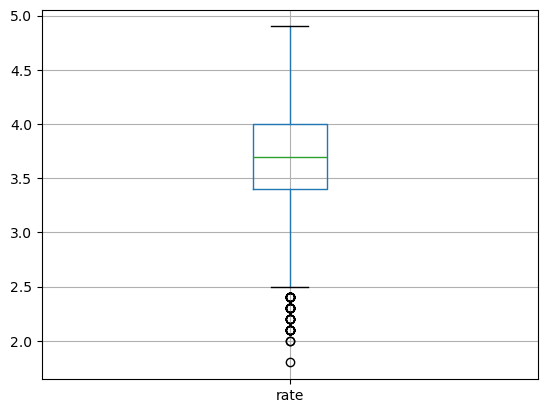

In [12]:
boxplot = df.boxplot(column=['rate']) 
plt.show()

In [13]:
df['rate'].median()

3.7

In [14]:
df['rate'].fillna(3.7, inplace = True)

df['rate'].isnull().sum()

0

Kolom approx_cost(for two people)

In [16]:
df['approx_cost(for two people)'].unique()

array(['500', '1,100', '250', '130', '200', '1,000', '350', nan, '750',
       '400', '550', '450', '300', '800', '1,200', '650', '1,400',
       '2,000', '600', '900', '1,500', '700', '1,600', '950', '1,800',
       '150', '1,900', '2,500', '1,300', '2,400', '100', '2,200', '3,000',
       '1,700', '850', '4,000', '2,100', '180', '360', '120', '3,500',
       '3,700', '80', '1,650', '2,800', '230', '199', '2,300', '1,250',
       '40', '4,500', '330', '1,350', '5,000', '3,400', '1,050', '50',
       '240', '2,600', '1,450'], dtype=object)

In [17]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          15000 non-null  object 
 1   name                         15000 non-null  object 
 2   online_order                 15000 non-null  object 
 3   book_table                   15000 non-null  object 
 4   rate                         15000 non-null  float64
 5   votes                        15000 non-null  int64  
 6   location                     14992 non-null  object 
 7   rest_type                    14931 non-null  object 
 8   cuisines                     14988 non-null  object 
 9   approx_cost(for two people)  14908 non-null  float64
 10  listed_in(type)              15000 non-null  object 
 11  sell_beverages               14988 non-null  object 
 12  sell_chinese_food            14988 non-null  object 
 13  sell_thai_food  

In [19]:
# Menghapus baris yang memiliki nilai NaN
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14844 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          14844 non-null  object 
 1   name                         14844 non-null  object 
 2   online_order                 14844 non-null  object 
 3   book_table                   14844 non-null  object 
 4   rate                         14844 non-null  float64
 5   votes                        14844 non-null  int64  
 6   location                     14844 non-null  object 
 7   rest_type                    14844 non-null  object 
 8   cuisines                     14844 non-null  object 
 9   approx_cost(for two people)  14844 non-null  float64
 10  listed_in(type)              14844 non-null  object 
 11  sell_beverages               14844 non-null  object 
 12  sell_chinese_food            14844 non-null  object 
 13  sell_thai_food       

Labeling

In [21]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['online_order']=label_encoding.fit_transform(df['online_order'])
df['book_table']=label_encoding.fit_transform(df['book_table'])
df['sell_beverages']=label_encoding.fit_transform(df['sell_beverages'])
df['sell_chinese_food']=label_encoding.fit_transform(df['sell_chinese_food'])
df['sell_thai_food']=label_encoding.fit_transform(df['sell_thai_food'])
df['sell_indian_food']=label_encoding.fit_transform(df['sell_indian_food'])
df['sell_mediterranean_food']=label_encoding.fit_transform(df['sell_mediterranean_food'])
df['sell_fast_food']=label_encoding.fit_transform(df['sell_fast_food'])
df['sell_desserts']=label_encoding.fit_transform(df['sell_desserts'])

df

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,1,0,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",500.0,Delivery,0,0,0,1,0,1,0
1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,0,0,3.7,0,JP Nagar,Quick Bites,"North Indian, Rajasthani",500.0,Delivery,0,0,0,1,0,0,0
2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,0,0,4.2,1279,Church Street,Pub,"Continental, Italian, Burger",1100.0,Drinks & nightlife,0,0,0,0,0,1,0
3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,0,0,2.9,58,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",250.0,Dine-out,0,1,0,1,0,0,0
4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,1,0,3.5,8,BTM,Dessert Parlor,Ice Cream,130.0,Delivery,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,https://www.zomato.com/bangalore/sri-vasavi-re...,Sri Vasavi Restaurant,0,0,3.6,30,Bellandur,Quick Bites,"Chinese, Biryani",250.0,Delivery,0,1,0,1,0,0,0
14996,https://www.zomato.com/bangalore/hoppipola-chu...,Hoppipola,1,0,4.3,1708,Church Street,Lounge,"Continental, Mediterranean, European",1300.0,Delivery,0,0,0,0,1,0,0
14997,https://www.zomato.com/bangalore/ghar-ki-rasoi...,Ghar Ki Rasoi,1,0,3.7,50,Bellandur,Casual Dining,North Indian,500.0,Delivery,0,0,0,1,0,0,0
14998,https://www.zomato.com/bangalore/ice-cubes-ind...,Ice Cubes,0,0,3.0,16,Indiranagar,Quick Bites,"Fast Food, Desserts, Beverages",300.0,Dine-out,1,0,0,0,0,1,1


In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

#One Hot Encoding Categorical to Numeric of listed_in(type)
df_list_enc = pd.DataFrame(enc.fit_transform(df[['listed_in(type)']]).toarray(),columns=enc.get_feature_names_out())
df=df.reset_index()
df=pd.concat([df,df_list_enc], axis=1)

df

,index,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,...,sell_mediterranean_food,sell_fast_food,sell_desserts,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,1,0,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,0,0,3.7,0,JP Nagar,Quick Bites,"North Indian, Rajasthani",...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,0,0,4.2,1279,Church Street,Pub,"Continental, Italian, Burger",...,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,0,0,2.9,58,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,1,0,3.5,8,BTM,Dessert Parlor,Ice Cream,...,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14839,14995,https://www.zomato.com/bangalore/sri-vasavi-re...,Sri Vasavi Restaurant,0,0,3.6,30,Bellandur,Quick Bites,"Chinese, Biryani",...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14840,14996,https://www.zomato.com/bangalore/hoppipola-chu...,Hoppipola,1,0,4.3,1708,Church Street,Lounge,"Continental, Mediterranean, European",...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14841,14997,https://www.zomato.com/bangalore/ghar-ki-rasoi...,Ghar Ki Rasoi,1,0,3.7,50,Bellandur,Casual Dining,North Indian,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14842,14998,https://www.zomato.com/bangalore/ice-cubes-ind...,Ice Cubes,0,0,3.0,16,Indiranagar,Quick Bites,"Fast Food, Desserts, Beverages",...,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


TF-IDF

In [24]:
df['cuisines'] = df['cuisines'].str.replace(',', '')

df_combined = df['location'] + " " + df['rest_type'] + " " + df['cuisines']
df_combined

0        Vasanth Nagar Delivery North Indian Biryani Fa...
1             JP Nagar Quick Bites North Indian Rajasthani
2             Church Street Pub Continental Italian Burger
3        Bannerghatta Road Quick Bites Bengali North In...
4                             BTM Dessert Parlor Ice Cream
                               ...                        
14839                Bellandur Quick Bites Chinese Biryani
14840    Church Street Lounge Continental Mediterranean...
14841                 Bellandur Casual Dining North Indian
14842    Indiranagar Quick Bites Fast Food Desserts Bev...
14843          Jayanagar Dessert Parlor Desserts Beverages
Length: 14844, dtype: object

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat vector dan matrix dari TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_combined)

# Merapikan baris
df = df.reset_index()
df = df.drop('index', axis = 1)

Scalling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
num_col = ['rate', 'votes', 'approx_cost(for two people)']

for col in num_col:
    df[col] = scaling.fit_transform(df[[col]])

Recommendation System

In [29]:
name = df['name']

# Drop kolom yang diperkirakan tidak digunakan untuk model nya
data = df.drop(['level_0','name','url','location','rest_type','cuisines','listed_in(type)'], axis = 1)

data

,online_order,book_table,rate,votes,approx_cost(for two people),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,1,0,0.645161,0.006060,0.092742,0,0,0,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0,0.612903,0.000059,0.092742,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,0.774194,0.076041,0.213710,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0.354839,0.003505,0.042339,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0.548387,0.000535,0.018145,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14839,0,0,0.580645,0.001842,0.042339,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14840,1,0,0.806452,0.101527,0.254032,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14841,1,0,0.612903,0.003030,0.092742,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14842,0,0,0.387097,0.001010,0.052419,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out() 
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

In [31]:
df_combined = pd.concat([data.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
df_combined.head()

,online_order,book_table,rate,votes,approx_cost(for two people),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,...,vasanth,vegan,vietnamese,vijay,west,whitefield,wilson,wraps,yelahanka,yeshwantpur
0,1,0,0.645161,0.006060,0.092742,0,0,0,1,0,...,0.650936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.612903,0.000059,0.092742,0,0,0,1,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.774194,0.076041,0.213710,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.354839,0.003505,0.042339,0,1,0,1,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0.548387,0.000535,0.018145,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.decomposition import TruncatedSVD

n_components = 150

svd = TruncatedSVD(n_components=n_components)
features_reduced = svd.fit_transform(df_combined)

features_reduced

array([[ 1.83237405e+00,  4.84087250e-01, -2.30071493e-01, ...,
        -2.87847271e-02, -1.13882627e-02, -1.07897691e-02],
       [ 1.18113633e+00, -1.07635818e-02, -6.58017735e-01, ...,
        -5.32177730e-03, -5.92216142e-03, -3.47872859e-03],
       [ 5.30517393e-01,  1.76140184e-01,  5.07698700e-01, ...,
        -1.30867753e-03,  3.78058212e-04,  1.44870060e-03],
       ...,
       [ 1.68321447e+00,  2.44947910e-01, -5.74048482e-01, ...,
        -2.31419051e-03, -5.48615748e-03,  2.43195157e-03],
       [ 8.31610262e-01,  1.35508419e-01,  1.51075848e+00, ...,
        -3.57906688e-03, -5.27495993e-02,  5.15761803e-02],
       [ 1.42461676e+00,  1.26284792e+00,  4.22966707e-01, ...,
        -5.25634313e-03, -1.44053860e-02,  1.31410969e-02]])

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(item_name, df, features_matrix, top_n=5):

    if item_name in df['name'].values:
        item_idx = df[df['name'] == item_name].index[0]
    else:
        return f"Keyword tidak ditemukan"

    item_features = features_matrix[item_idx]

    similarity_scores = cosine_similarity([item_features], features_matrix)[0]

    top_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]  
    recommendations = df.iloc[top_indices][['name','location','cuisines']]
    
    return recommendations

In [34]:
item_name = "Burger King"
recommendations = get_recommendations(item_name, df, features_reduced)

recommendations

,name,location,cuisines
4272,Maddy's Katti Cafe,Malleshwaram,Fast Food Beverages
11271,Burger King,Kammanahalli,Burger Fast Food Beverages
8008,Burger Lounge,Koramangala 5th Block,Burger Fast Food Beverages
5942,Burger Lounge,Koramangala 5th Block,Burger Fast Food Beverages
9949,Burger King,Electronic City,Burger Fast Food Beverages


In [35]:
item_name = "Faasos"
recommendations = get_recommendations(item_name, df, features_reduced)

recommendations

,name,location,cuisines
1523,Faasos,Vasanth Nagar,North Indian Biryani Fast Food
5241,Grub Bucket,Rammurthy Nagar,North Indian Biryani Fast Food
10104,Faasos,Sahakara Nagar,North Indian Biryani Fast Food
14468,Tandoor Bhatti,Rammurthy Nagar,North Indian Fast Food
8422,Faasos,Sarjapur Road,North Indian Biryani Fast Food


In [36]:
item_name = "Ice Cubes"
recommendations = get_recommendations(item_name, df, features_reduced)

recommendations

,name,location,cuisines
7709,LocalHost,Whitefield,Fast Food Street Food Desserts Beverages
9847,Lakeview Milkbar,Indiranagar,Fast Food Desserts Cafe
5303,Lakeview Milkbar,MG Road,Desserts Fast Food Beverages
4286,Lakeview Milkbar,MG Road,Desserts Fast Food Beverages
5523,Roll King,City Market,Rolls Fast Food Beverages Desserts


Setelah membuat dan menguji model Recommendation System, terlihat bahwa hanya beberapa output yang sesuai persis dengan nama restoran yang diinput. Namun, ada juga yang tidak sesuai langsung dengan nama restoran, melainkan tetap berhubungan dengan jenis cuisines atau lokasi yang serupa dengan input. Contohnya:
- Faasos: Saat menguji model dengan input "Faasos", hanya 3 output yang sama dengan yang diinput. Sementara 2 output lainnya memiliki tipe cuisines yang serupa dengan input, meskipun nama restorannya berbeda.
- Ice Cubes: Ketika menguji model dengan input "Ice Cubes", tidak ada output yang persis sama dengan nama tersebut. Namun, karena cuisines dari Ice Cubes adalah Fast Food, Desserts, dan Beverages, maka 5 output yang dihasilkan memiliki tipe cuisines yang serupa.

Kesimpulannya, setelah melakukan percobaan pada Recommendation System, diperoleh bahwa saat pengguna memasukkan nama restoran sebagai input, sistem lebih cenderung memberikan rekomendasi yang berhubungan dengan cuisines atau lokasi yang memiliki kesamaan dengan input tersebut. Hal ini menunjukkan bahwa sistem dapat mengenali pola preferensi berdasarkan kesamaan cuisines atau kategori terkait.